## Objective
- Build Supervised Learning Model on cancer data

### Input data:
* Students to update the commentary

### Output data:
* Students to update

Owner Name

[Markdown Syntax](https://sourceforge.net/p/jupiter/wiki/markdown_syntax/)

#### 1. Load Packages

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier


#### 2. Helper functions

In [3]:
### Sample function

def getShape(data):
    print("# of rows:", data.shape[0], "\n")
    print("# of columns:", data.shape[1], "\n")
    print(data.info())

In [4]:
# A small function to compare predicted values with actual and count how many are correct

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

#### 3. Load Data & Data understanding

In [5]:
bc_df = pd.read_csv("wisc_bc_data.csv")

In [6]:
bc_df.shape

(569, 32)

In [7]:
bc_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  \
0          0.10280           0.06981         0.03987      0.03700   
1          0.09688           0.11470         0.06387      0.02642   
2          0.10770           0.07804         0.03046      0.02480   
3          0.11640           0.11360         0.04635      0.04796   
4          0.07963           0.06934         0.03393      0.02657   

        ...         radius_worst  texture_worst  perimeter_worst  area_worst  \
0       ...                13.50          15.64            86.97       549.1   
1       ...                11.88          22.94            78.28       424.8   
2       ...                12.41          26.44            79.93       471.4   
3       ...                11.92          15.77            76.53       434.0   
4       ...                16.20          15.73           104.50       819.1   

   smoothness_worst  compactness_worst  concavity_worst  points_worst  \
0            0.1385             0.1266          0.12420       0.09391   
1            0.1213             0.2515          0.19160       0.07926   
2            0.1369             0.1482          0.10670       0.07431   
3            0.1367             0.1822          0.08669       0.08611   
4            0.1126             0.1737          0.13620       0.08178   

   symmetry_worst  dimension_worst  
0          0.2827          0.06771  
1          0.2940          0.07587  
2          0.2998          0.07881  
3          0.2102          0.06784  
4          0.2487          0.06766  

[5 rows x 32 columns]

In [8]:
getShape(data=bc_df)

# of rows: 569 

# of columns: 32 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          5

In [9]:
bc_df.dtypes.value_counts()

float64    30
object      1
int64       1
dtype: int64

In [10]:
pd.DataFrame(bc_df.dtypes)

0
id                   int64
diagnosis           object
radius_mean        float64
texture_mean       float64
perimeter_mean     float64
area_mean          float64
smoothness_mean    float64
compactness_mean   float64
concavity_mean     float64
points_mean        float64
symmetry_mean      float64
dimension_mean     float64
radius_se          float64
texture_se         float64
perimeter_se       float64
area_se            float64
smoothness_se      float64
compactness_se     float64
concavity_se       float64
points_se          float64
symmetry_se        float64
dimension_se       float64
radius_worst       float64
texture_worst      float64
perimeter_worst    float64
area_worst         float64
smoothness_worst   float64
compactness_worst  float64
concavity_worst    float64
points_worst       float64
symmetry_worst     float64
dimension_worst    float64

In [11]:
bc_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
bc_df.diagnosis.value_counts(normalize=True)
# Class distribution among B and M is almost 2:1. The model will better predict B and M

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [13]:
bc_df['diagnosis'] = bc_df.diagnosis.astype('category')
bc_df.dtypes
bc_df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  points_mean  \
count       569.000000        569.000000      569.000000   569.000000   
mean          0.096360          0.104341        0.088799     0.048919   
std           0.014064          0.052813        0.079720     0.038803   
min           0.052630          0.019380        0.000000     0.000000   
25%           0.086370          0.064920        0.029560     0.020310   
50%           0.095870          0.092630        0.061540     0.033500   
75%           0.105300          0.130400        0.130700     0.074000   
max           0.163400          0.345400        0.426800     0.201200   

       symmetry_mean       ...         radius_worst  texture_worst  \
count     569.000000       ...           569.000000     569.000000   
mean        0.181162       ...            16.269190      25.677223   
std         0.027414       ...             4.833242       6.146258   
min         0.106000       ...             7.930000      12.020000   
25%         0.161900       ...            13.010000      21.080000   
50%         0.179200       ...            14.970000      25.410000   
75%         0.195700       ...            18.790000      29.720000   
max         0.304000       ...            36.040000      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  points_worst  symmetry_worst  dimension_worst  
count       569.000000    569.000000      569.000000       569.000000  
mean          0.272188      0.114606        0.290076         0.083946  
std           0.208624      0.065732        0.061867         0.018061  
min           0.000000      0.000000        0.156500         0.055040  
25%           0.114500      0.064930        0.250400         0.071460  
50%           0.226700      0.099930        0.282200         0.080040  
75%           0.382900      0.161400        0.317900         0.092080  
max           1.252000      0.291000        0.663800         0.207500  

[8 rows x 31 columns]

drop the first column from the data frame. This is Id column which is not used in modeling

In [14]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bc_df = bc_df.drop(labels = "id", axis = 1)

In [15]:
# Create a separate dataframe consisting only of the features i.e independent attributes

bc_feature_df = bc_df.drop(labels= "diagnosis" , axis = 1)

#### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [16]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

In [17]:
bc_feature_df_z.describe()

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.162905e-16 -7.373520e-16   -1.303390e-16 -2.239958e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean   points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02  5.690000e+02   
mean      1.598019e-16      1.730699e-16    3.707247e-17 -5.775501e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00  1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00 -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01 -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01 -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01  6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00  3.927930e+00   

       symmetry_mean  dimension_mean       ...         radius_worst  \
count   5.690000e+02    5.690000e+02       ...         5.690000e+02   
mean    1.449729e-16   -1.523630e-15       ...        -8.507157e-17   
std     1.000880e+00    1.000880e+00       ...         1.000880e+00   
min    -2.744117e+00   -1.819865e+00       ...        -1.726901e+00   
25%    -7.032397e-01   -7.226392e-01       ...        -6.749213e-01   
50%    -7.162650e-02   -1.782793e-01       ...        -2.690395e-01   
75%     5.307792e-01    4.709834e-01       ...         5.220158e-01   
max     4.484751e+00    4.910919e+00       ...         4.094189e+00   

       texture_worst  perimeter_worst    area_worst  smoothness_worst  \
count   5.690000e+02     5.690000e+02  5.690000e+02      5.690000e+02   
mean    6.634022e-18    -3.570665e-16 -1.888745e-16     -2.265323e-16   
std     1.000880e+00     1.000880e+00  1.000880e+00      1.000880e+00   
min    -2.223994e+00    -1.693361e+00 -1.222423e+00     -2.682695e+00   
25%    -7.486293e-01    -6.895783e-01 -6.421359e-01     -6.912304e-01   
50%    -4.351564e-02    -2.859802e-01 -3.411812e-01     -4.684277e-02   
75%     6.583411e-01     5.402790e-01  3.575891e-01      5.975448e-01   
max     3.885905e+00     4.287337e+00  5.930172e+00      3.955374e+00   

       compactness_worst  concavity_worst  points_worst  symmetry_worst  \
count       5.690000e+02     5.690000e+02  5.690000e+02    5.690000e+02   
mean       -4.487720e-18     9.112024e-17  2.302396e-16    2.718973e-16   
std         1.000880e+00     1.000880e+00  1.000880e+00    1.000880e+00   
min        -1.443878e+00    -1.305831e+00 -1.745063e+00   -2.160960e+00   
25%        -6.810833e-01    -7.565142e-01 -7.563999e-01   -6.418637e-01   
50%        -2.695009e-01    -2.182321e-01 -2.234689e-01   -1.274095e-01   
75%         5.396688e-01     5.311411e-01  7.125100e-01    4.501382e-01   
max         5.112877e+00     4.700669e+00  2.685877e+00    6.046041e+00   

       dimension_worst  
count     5.690000e+02  
mean      1.882891e-16  
std       1.000880e+00  
min      -1.601839e+00  
25%      -6.919118e-01  
50%      -2.164441e-01  
75%       4.507624e-01  
max       6.846856e+00  

[8 rows x 30 columns]

In [18]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 

bc_labels = bc_df["diagnosis"]

In [19]:
# store the normalized features data into np array 

X = np.array(bc_feature_df_z)

In [20]:
# store the bc_labels data into a separate np array

y = np.array(bc_labels)

In [21]:
# Break the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [22]:
NNH = KNeighborsClassifier(n_neighbors= 5)

# weights :  optional (default = ‘uniform’)
#weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian

In [23]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_predict = NNH.predict(X_test)

In [25]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(y_test, y_predict)

In [26]:
NNH.score(X_test, y_test)

0.9680851063829787

In [27]:
print(accuracy_score)

96.80851063829788


In [28]:
metrics.confusion_matrix(y_test, y_predict)

array([[124,   2],
       [  4,  58]], dtype=int64)

In [29]:
# To improve performance ------------------------- Iteration 2 -----------------------------------


In [30]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix

sns.pairplot(bc_df)

In [31]:
# As is evident from the scatter matrix, many dimensions have strong correlation and that is not surprising
# Area and Perimeter are function of radius, so they will have strong correlation. Why take multiple dimensions 
# when they convey the same information to the model?

In [32]:
# To to drop dependent columns from bc_df

bc_features_pruned_df_z =  bc_feature_df_z.drop(['perimeter_mean', 'area_mean'], axis=1)

In [33]:
X = np.array(bc_features_pruned_df_z)

In [34]:
# Break the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(bc_features_pruned_df_z, y, test_size=0.33, random_state=1)


In [35]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_pred_class = NNH.predict(X_test)

In [37]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(y_test, y_pred_class)

In [38]:
print(accuracy_score) # calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

96.80851063829788
0.9680851063829787


In [39]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[124   2]
 [  4  58]]


- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes 
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes 

In [45]:
# creating add list of K for KNN
myList  = list(range(1,50))

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
    
MSE = [1-x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % best_k)

The optimal number of neighbors is 3


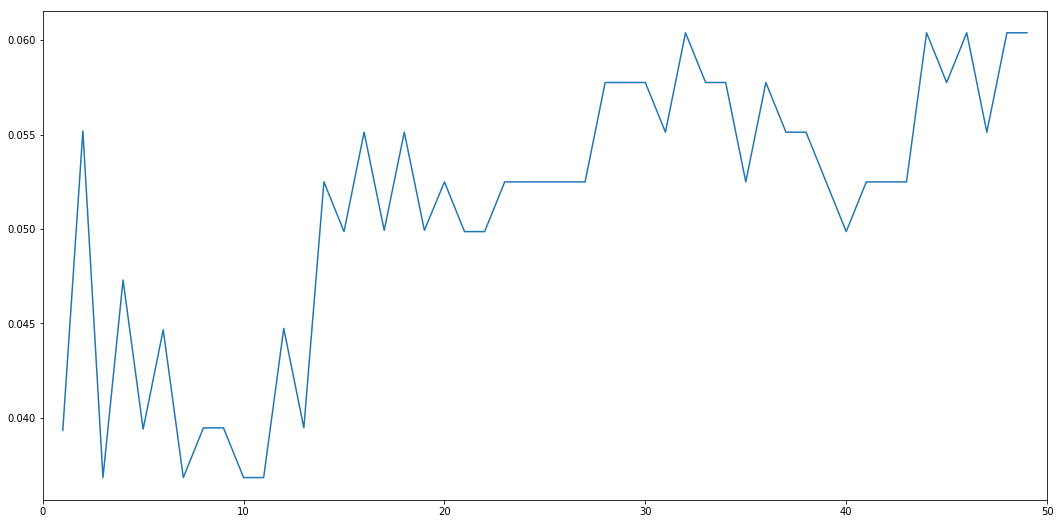

In [46]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)

# plot misclassification error vs k
plt.plot(k_neighbors, MSE)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Misclassification Error')
plt.show()